In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


In [2]:
Weather_data = pd.read_csv("Weather_history_windUpdated_more.csv")

In [3]:
Weather_data.head(10)


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Boise, ID",01/01/2020,46.1,37.1,40.9,29.7,NaN,0.20,NaN,13.9,31.1,9.8,64.9,78.89,"Rain, Partially cloudy"
1,"Boise, ID",01/02/2020,44.1,33.2,38.8,31.3,NaN,0.00,NaN,13.8,12.8,9.9,63.0,69.08,Partially cloudy
2,"Boise, ID",01/03/2020,48.8,34.0,40.8,29.0,NaN,0.00,NaN,19.5,16.1,9.9,3.7,63.65,Clear
3,"Boise, ID",01/04/2020,45.0,30.8,39.9,25.9,NaN,0.00,NaN,19.5,33.5,9.9,25.7,53.83,Partially cloudy
4,"Boise, ID",01/05/2020,38.0,29.9,33.8,24.9,NaN,0.05,NaN,11.3,30.5,8.8,63.2,76.31,"Rain, Partially cloudy"
5,"Boise, ID",01/06/2020,39.8,29.1,34.7,23.0,NaN,0.02,NaN,12.7,31.0,9.7,76.7,80.71,"Rain, Overcast"
6,"Boise, ID",01/07/2020,51.2,35.9,41.7,28.0,NaN,0.00,NaN,14.8,24.2,9.9,22.4,65.64,Clear
7,"Boise, ID",01/08/2020,45.0,32.0,38.5,30.2,NaN,0.08,NaN,17.2,28.9,9.3,75.7,71.22,"Rain, Overcast"
8,"Boise, ID",01/09/2020,37.2,29.1,32.9,22.4,NaN,0.11,NaN,20.6,31.3,8.9,71.7,77.84,"Rain, Partially cloudy"
9,"Boise, ID",01/10/2020,37.1,23.0,31.1,13.9,NaN,0.00,NaN,19.6,30.0,9.9,75.3,64.45,Overcast


In [4]:
for i in range(len(Weather_data)):
    if (Weather_data.loc[i,'Conditions'].find("Rain")):
        Weather_data.loc[i,'Conditions']=1
    else:
        Weather_data.loc[i,'Conditions']=0

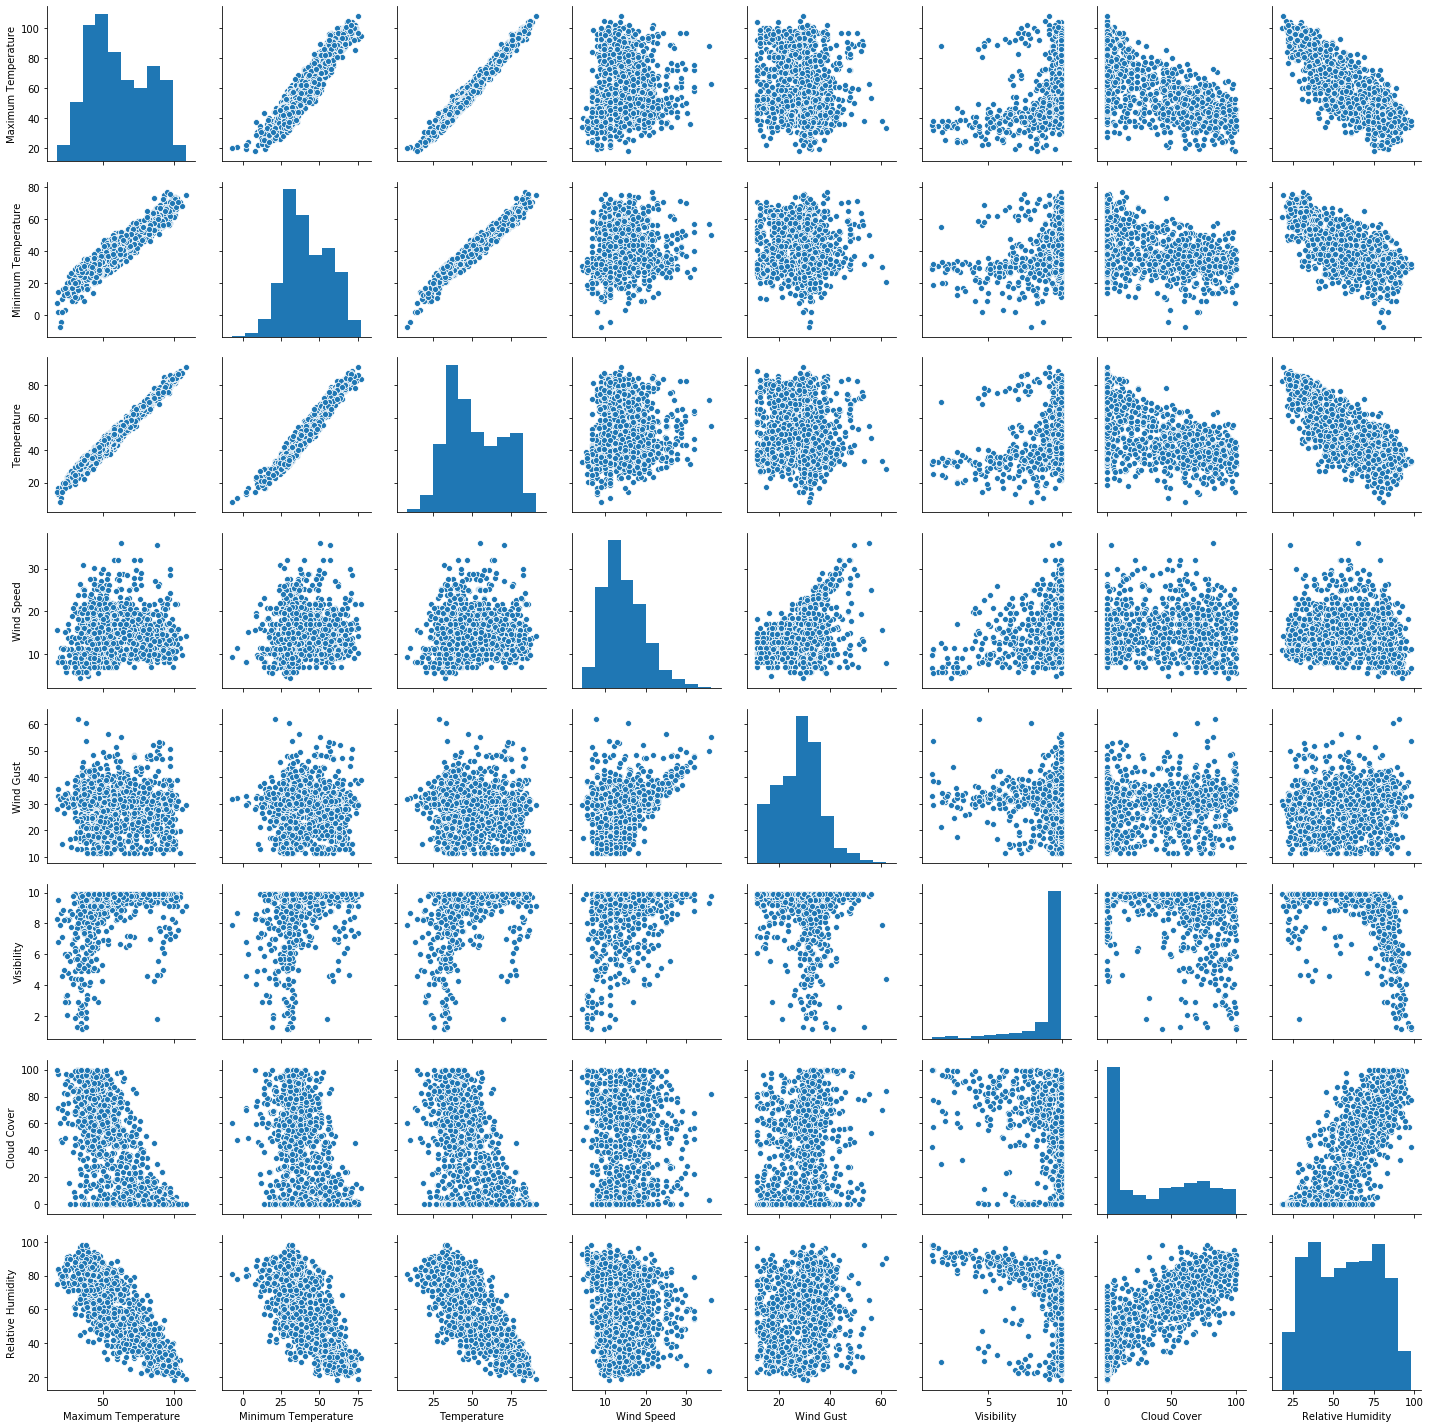

In [5]:
weather = Weather_data
wc = weather.drop(columns=["Name","Date time", "Wind Chill", "Heat Index","Precipitation", "Snow Depth", "Conditions"])
sns.pairplot(wc)

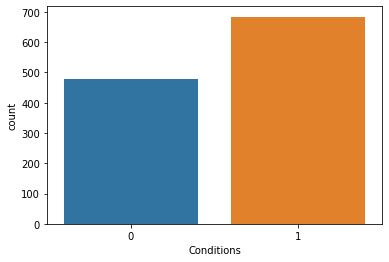

In [6]:
ax = sns.countplot(x="Conditions", data=Weather_data)

In [7]:
# Standarize data
maxTem = Weather_data[['Maximum Temperature']].values
minTem = Weather_data[['Minimum Temperature']].values
Tem = Weather_data[['Temperature']].values
windSpeed = Weather_data[['Wind Speed']].values
windGust = Weather_data[['Wind Gust']].values
humidity = Weather_data[['Relative Humidity']].values
visibility = Weather_data[['Visibility']].values
cloud = Weather_data[['Cloud Cover']].values

In [8]:

Standard_scaler = preprocessing.QuantileTransformer()
#Standard_scaler = preprocessing.MinMaxScaler()
#Standard_scaler = preprocessing.StandardScaler()
maxTem_scaled = Standard_scaler.fit_transform(maxTem)
minTem_scaled = Standard_scaler.fit_transform(minTem)
Tem_scaled = Standard_scaler.fit_transform(Tem)
windSpeed_scaled = Standard_scaler.fit_transform(windSpeed)
windGust_scaled = Standard_scaler.fit_transform(windGust)
humidity_scaled = Standard_scaler.fit_transform(humidity)
visibility_scaled = Standard_scaler.fit_transform(visibility)
cloud_scaled = Standard_scaler.fit_transform(cloud)
Weather_data[['Visibility']]= Weather_data[['Visibility']].replace(visibility,visibility_scaled)
Weather_data[['Cloud Cover']]= Weather_data[['Cloud Cover']].replace(cloud,cloud_scaled)
Weather_data[['Maximum Temperature']]= Weather_data[['Maximum Temperature']].replace(maxTem,maxTem_scaled)
Weather_data[['Minimum Temperature']]= Weather_data[['Minimum Temperature']].replace(minTem,minTem_scaled)
Weather_data[['Temperature']]= Weather_data[['Temperature']].replace(Tem,Tem_scaled)
Weather_data[['Wind Speed']]= Weather_data[['Wind Speed']].replace(windSpeed,windSpeed_scaled)
Weather_data[['Wind Gust']]= Weather_data[['Wind Gust']].replace(windGust,windGust_scaled)
Weather_data[['Relative Humidity']]= Weather_data[['Relative Humidity']].replace(humidity,humidity_scaled)
Weather_data

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Boise, ID",01/01/2020,0.279780,0.444945,0.345846,29.7,NaN,0.20,NaN,0.505005,0.612112,0.441942,0.739740,0.804805,0
1,"Boise, ID",01/02/2020,0.243744,0.331832,0.299299,31.3,NaN,0.00,NaN,0.476476,0.028028,1.000000,0.723724,0.662747,1
2,"Boise, ID",01/03/2020,0.349850,0.347347,0.342342,29.0,NaN,0.00,NaN,0.830330,0.092593,1.000000,0.335335,0.580874,1
3,"Boise, ID",01/04/2020,0.265766,0.249750,0.323323,25.9,NaN,0.00,NaN,0.830330,0.756256,1.000000,0.482944,0.439519,1
4,"Boise, ID",01/05/2020,0.120621,0.219219,0.155155,24.9,NaN,0.05,NaN,0.267768,0.572072,0.207708,0.725726,0.767171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,"Boise, ID",12/19/2009,0.106607,0.196697,0.136136,23.9,NaN,0.01,NaN,0.158659,0.758759,0.048048,0.726727,0.940672,0
1157,"Boise, ID",12/20/2009,0.205706,0.219219,0.197698,26.0,NaN,0.01,NaN,0.320320,0.588589,0.081081,0.564738,0.912511,0
1158,"Boise, ID",12/22/2009,0.088589,0.136637,0.093964,16.7,NaN,0.15,NaN,0.830330,0.640140,0.081081,0.677678,0.896897,0
1159,"Boise, ID",12/30/2009,0.070070,0.210210,0.097097,20.1,NaN,0.18,NaN,0.541041,0.632132,0.032533,0.810345,0.915916,0


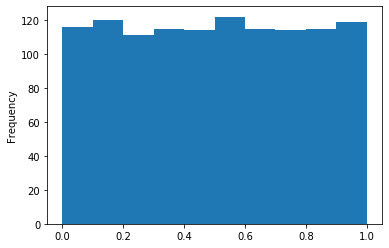

In [9]:
Weather_data['Maximum Temperature'].plot.hist()


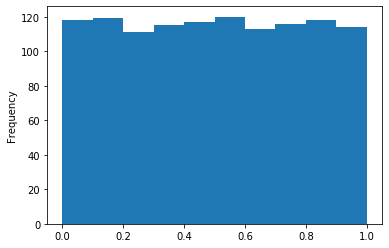

In [10]:
Weather_data["Minimum Temperature"].plot.hist()


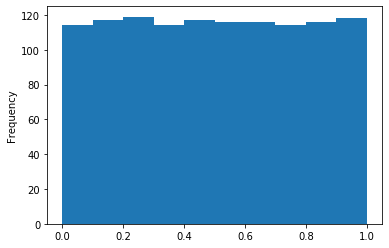

In [11]:
Weather_data["Temperature"].plot.hist()


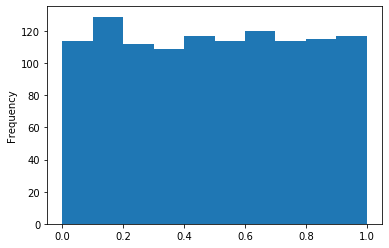

In [12]:
Weather_data["Wind Speed"].plot.hist()


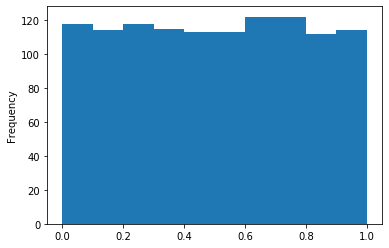

In [13]:
Weather_data["Wind Gust"].plot.hist()


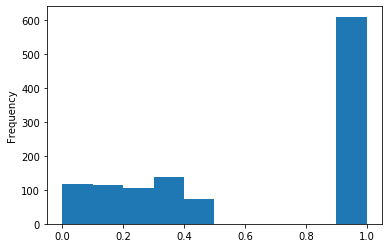

In [14]:
Weather_data["Visibility"].plot.hist()


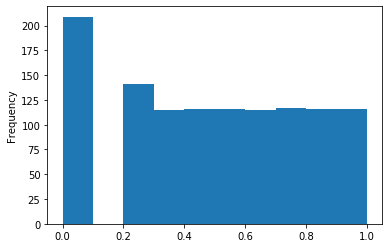

In [15]:
Weather_data["Cloud Cover"].plot.hist()


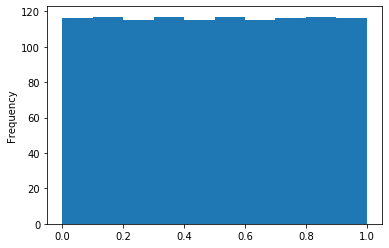

In [16]:
Weather_data["Relative Humidity"].plot.hist()

In [17]:
feature_cols = ['Maximum Temperature','Minimum Temperature','Temperature','Wind Speed',"Wind Gust",'Visibility','Cloud Cover', 'Relative Humidity']
X = Weather_data[feature_cols] # Features
y = Weather_data.Conditions # Target variable

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=50)
#repeated random teat-train splits
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.25, random_state=100)
model_shufflecv = LogisticRegression(max_iter=1500, solver="lbfgs")
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
model_shufflecv.fit(X_train,y_train)
y_pred = model_shufflecv.predict(X_test)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))


Accuracy: 90.58% (0.82%)


In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall:", metrics.recall_score(y_test, y_pred, average = "macro"))
print("precision:", metrics.precision_score(y_test, y_pred, average = "macro"))
print("f1:", metrics.f1_score(y_test, y_pred, average = "macro"))

Accuracy: 0.9209621993127147
recall: 0.9173076923076924
precision: 0.926253758851489
f1: 0.9198683029033223


Text(0.5, 0, 'Importance')

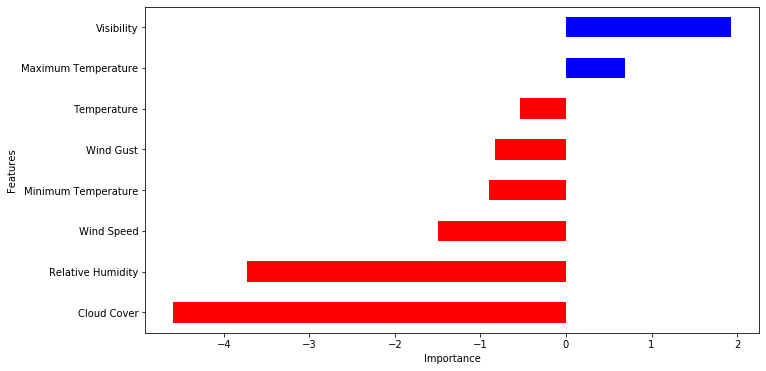

In [26]:
coeff = list(model_shufflecv.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features["Features"] = labels
features["importance"] = coeff
features.sort_values(by = ['importance'], ascending = True, inplace = True)
features['positive'] = features['importance']> 0
features.set_index('Features', inplace = True)
features.importance.plot(kind="barh", figsize=(11,6), color= features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [27]:
coeff

[0.6850491605202433,
 -0.9044206062326963,
 -0.5401993825601297,
 -1.49853565203962,
 -0.8316456918245663,
 1.9317231297594197,
 -4.591987597368753,
 -3.7327043488001053]